### Context

호텔 방을 예약하기에 가장 좋은시기가 언제인지 궁금한 적이 있습니까? 아니면 최고의 일일 요금을 얻기 위해 최적의 체류 기간? 호텔이 불균형 적으로 많은 수의 특별 요청을받을 가능성이 있는지 여부를 예측하려면 어떻게해야합니까?

이 호텔 예약 데이터 세트는 이러한 질문을 탐색하는 데 도움이 될 수 있습니다!

### Content
이 데이터 세트에는 도시 호텔 및 리조트 호텔의 예약 정보가 포함되며 예약 시점, 숙박 기간, 성인, 어린이 및 / 또는 아기 수, 주차 공간 수, 다른 것들 사이.
모든 개인 식별 정보가 데이터에서 제거되었습니다.

### Acknowledgements
이 데이터는 원래 Nuno Antonio, Ana Almeida 및 Luis Nunes가 2019 년 2 월 22 일자 데이터 요약을 위해 작성한 Hotel Booking Demand Datasets 기사에 있습니다. 이 데이터는 2020 년 2 월 11 일 주 #TidyTuesday의 Thomas Mock과 Antoine Bichat에 의해 다운로드 및 정리되었습니다.

### Inspiration
이 데이터 세트는 탐색 적 데이터 분석 (EDA)을 연습하거나 예측 모델 구축을 시작하려는 사람에게 이상적입니다!

데이터 시각화에 대한 영감을 얻으려면 참가자가 Twitter에서 지정된 데이터 세트에 대한 코드 및 시각화를 작성하고 공유하도록 장려하는 무료 주간 주간 온라인 이벤트 인 #TidyTuesday 프로그램을 확인하십시오.

예측 모델링에 뛰어 들기를 원한다면 Julia Silge는 깔끔한 모델 R 패키지를 강조하는 접근성 있고 환상적인 연습을 제공합니다.

In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [103]:
booking = pd.read_csv("../hotel-booking-demend/hotel_bookings.csv")

In [104]:
booking.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [105]:
booking['hotel'].value_counts()

City Hotel      79330
Resort Hotel    40060
Name: hotel, dtype: int64

In [106]:
booking['hotel'].unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

호텔 사이의 카테코리에 해당되는 비율은 비슷한것으로 측정된다. 

In [107]:
booking.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [108]:
booking = booking.drop(['company'],axis=1)

In [109]:
booking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 31 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [110]:
booking = booking.dropna(axis=0)

In [111]:
booking.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102894 entries, 3 to 119389
Data columns (total 31 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           102894 non-null  object 
 1   is_canceled                     102894 non-null  int64  
 2   lead_time                       102894 non-null  int64  
 3   arrival_date_year               102894 non-null  int64  
 4   arrival_date_month              102894 non-null  object 
 5   arrival_date_week_number        102894 non-null  int64  
 6   arrival_date_day_of_month       102894 non-null  int64  
 7   stays_in_weekend_nights         102894 non-null  int64  
 8   stays_in_week_nights            102894 non-null  int64  
 9   adults                          102894 non-null  int64  
 10  children                        102894 non-null  float64
 11  babies                          102894 non-null  int64  
 12  meal            

In [112]:
booking['hotel'] = booking['hotel'].map({"City Hotel": 0, "Resort Hotel":1})

In [113]:
booking["hotel"].unique()

array([1, 0])

In [114]:
booking.shape

(102894, 31)

In [115]:
sns.set()

In [116]:
plt.figure(figsize=(10,5))

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

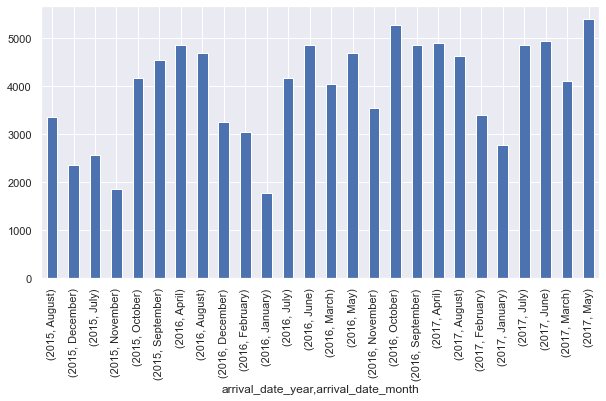

In [117]:
booking.groupby(['arrival_date_year','arrival_date_month']).size().plot.bar(figsize=(10,5))

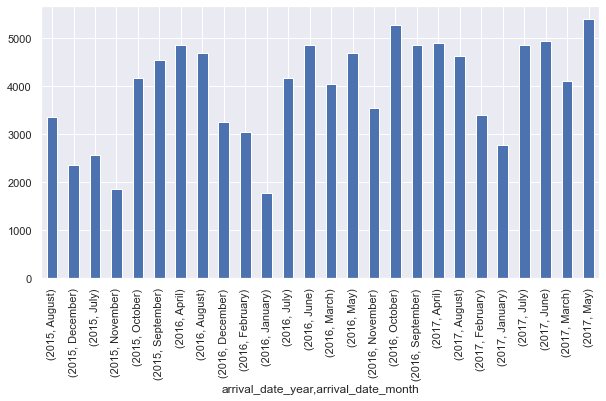

In [118]:
booking.groupby(['arrival_date_year','arrival_date_month'])['adults'].size().plot.bar(figsize=(10,5))

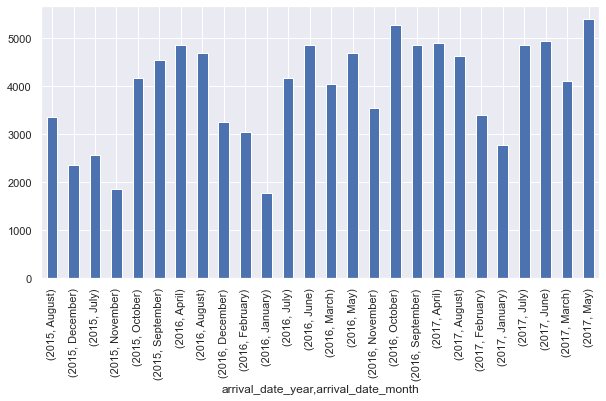

In [119]:
booking.groupby(['arrival_date_year','arrival_date_month'])['children'].size().plot.bar(figsize=(10,5))

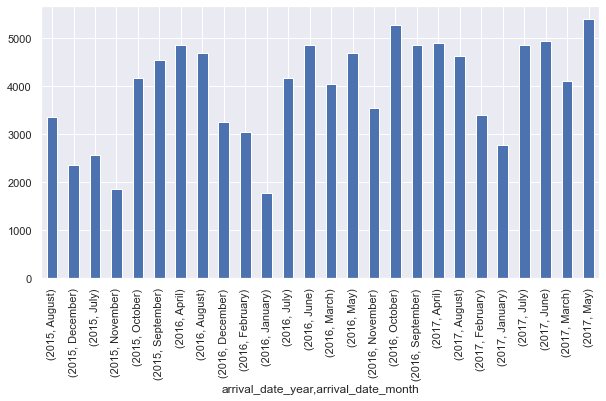

In [120]:
booking.groupby(['arrival_date_year','arrival_date_month']).size().plot.bar(figsize=(10,5))

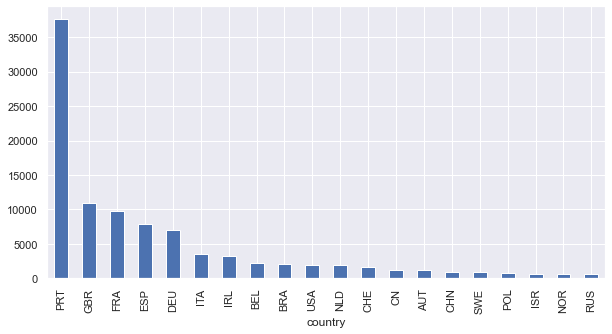

In [122]:
plt.figure(figsize=(10,5))
booking.groupby(['country']).size().sort_values(ascending= False).head(20).plot.bar()

In [123]:
booking.groupby(['country']).size().sort_values(ascending = False)

country
PRT    37591
GBR    10889
FRA     9810
ESP     7848
DEU     6998
       ...  
PYF        1
BHS        1
RWA        1
SDN        1
NCL        1
Length: 174, dtype: int64

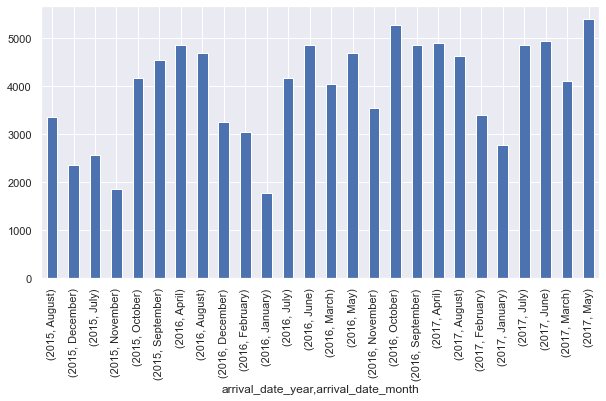

In [124]:
booking.groupby(['arrival_date_year','arrival_date_month'])['adults'].size().plot.bar(figsize=(10,5))

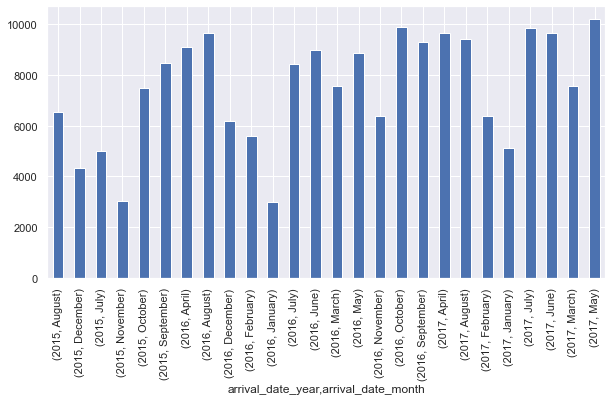

In [125]:
booking.groupby(['arrival_date_year','arrival_date_month'])['adults'].sum().plot.bar(figsize=(10,5))

/Users/leehyoungwook/anaconda3/envs/tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


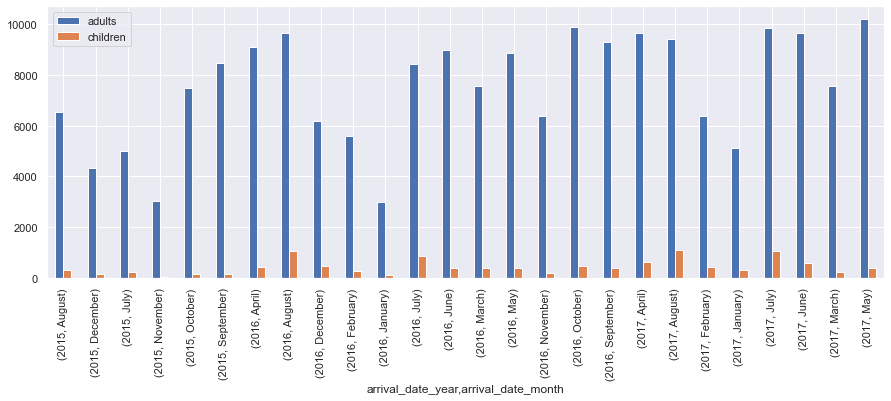

In [128]:
booking.groupby(['arrival_date_year','arrival_date_month'])['adults','children'].sum().plot.bar(figsize=(15,5))

/Users/leehyoungwook/anaconda3/envs/tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


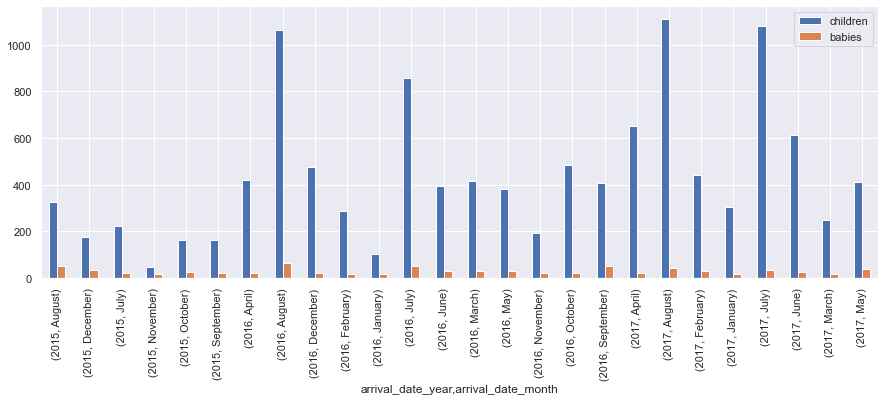

In [129]:
booking.groupby(['arrival_date_year','arrival_date_month'])['children','babies'].sum().plot.bar(figsize=(15,5))

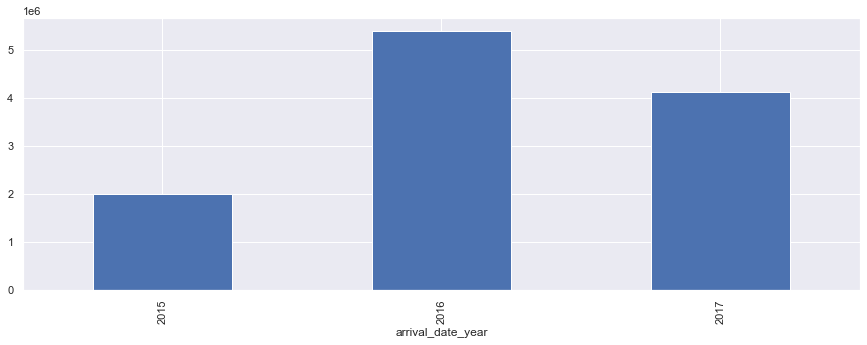

In [130]:
booking.groupby(['arrival_date_year'])['lead_time'].sum().plot.bar(figsize=(15,5))

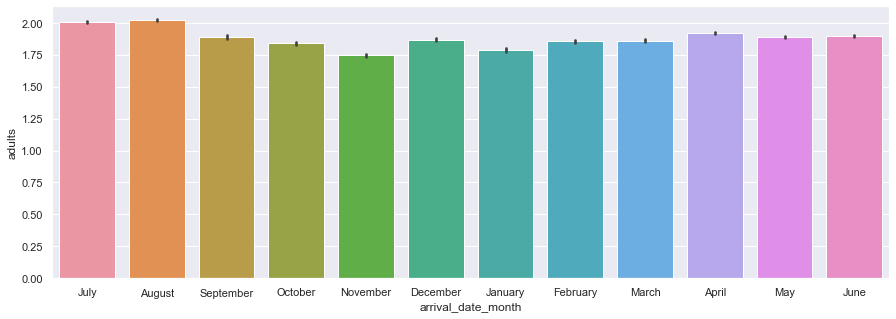

In [132]:
plt.figure(figsize=(15,5))
sns.barplot(x='arrival_date_month', y ='adults', data=  booking)
plt.show()

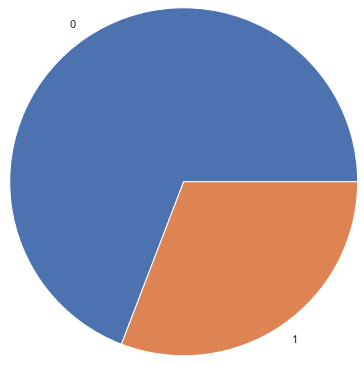

In [136]:
booking.groupby(['hotel']).size().plot.pie(radius=2)

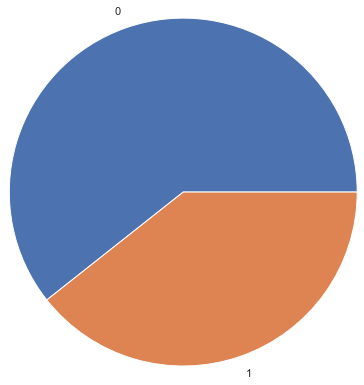

In [139]:
booking.groupby(['hotel'])['booking_changes'].sum().plot.pie(radius=2)
plt.show()

In [144]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
def labeling(feature):
    booking[feature] = label_encoder.fit_transform(booking[feature])

In [160]:
labeling('customer_type')
labeling('assigned_room_type')
labeling('deposit_type')
labeling('reservation_status')
labeling('meal')
labeling('country')
labeling('distribution_channel')
labeling('market_segment')
labeling('reserved_room_type')
labeling('reservation_status_date')
booking['arrival_date_month'] = booking['arrival_date_month'].map({'January':1, 'February': 2, 'March':3, 'April':4, 'May':5, 'June':6, 'July':7,
                                                            'August':8, 'September':9, 'October':10, 'November':11, 'December':12})
booking['arrival_date_month'].unique()

array([ 7,  8,  9, 10, 11, 12,  1,  2,  3,  4,  5,  6])

In [161]:
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.linear_model import LinearRegression, LogisticRegression,Ridge,Lasso
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor

In [174]:
x = booking.drop(['previous_cancellations'],axis=1)
y = booking['previous_cancellations']

In [163]:
x_test,x_train,y_test,y_train = train_test_split(x,y,test_size=0.2,random_state=0)
regressor = LinearRegression()
regressor.fit(x_train,y_train)

y_pred = regressor.predict(x_test)

print('Mean Absolute Error_lng:', metrics.mean_absolute_error(y_test, y_pred).round(3))  
print('Mean Squared Error_lng:', metrics.mean_squared_error(y_test, y_pred).round(3))  
print('Root Mean Squared Error_lng:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)).round(3))
print('r2_score_lng:', r2_score(y_test, y_pred).round(3))

## Linear Regression above##

Mean Absolute Error_lng: 0.173
Mean Squared Error_lng: 0.542
Root Mean Squared Error_lng: 0.737
r2_score_lng: 0.066


/Users/leehyoungwook/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/linear_model/base.py:509: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)


In [164]:
ridge = Ridge(alpha=1.0)
ridge.fit(x_train, y_train) #training the algorithm

y_pred = ridge.predict(x_test)

print('Mean Absolute Error_ridge:', metrics.mean_absolute_error(y_test, y_pred).round(3))  
print('Mean Squared Error_ridge:', metrics.mean_squared_error(y_test, y_pred).round(3))  
print('Root Mean Squared Error_ridge:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)).round(3))
print('r2_score_ridge:', r2_score(y_test, y_pred).round(3))

Mean Absolute Error_ridge: 0.173
Mean Squared Error_ridge: 0.542
Root Mean Squared Error_ridge: 0.737
r2_score_ridge: 0.066


In [165]:
clf = Lasso(alpha=0.1)

clf.fit(x_train, y_train) #training the algorithm

y_pred = clf.predict(x_test)

print('Mean Absolute Error_lasso:', metrics.mean_absolute_error(y_test, y_pred).round(3))  
print('Mean Squared Error_lasso:', metrics.mean_squared_error(y_test, y_pred).round(3))  
print('Root Mean Squared Error_lasso:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)).round(3))
print('r2_score_lasso:', r2_score(y_test, y_pred).round(3))


Mean Absolute Error_lasso: 0.169
Mean Squared Error_lasso: 0.56
Root Mean Squared Error_lasso: 0.748
r2_score_lasso: 0.037


In [166]:
logreg = LogisticRegression(solver = 'lbfgs')
# fit the model with data
logreg.fit(x_train,y_train)
y_pred=logreg.predict(x_test)

print('Mean Absolute Error_logreg:', metrics.mean_absolute_error(y_test, y_pred).round(3))  
print('Mean Squared Error_logreg:', metrics.mean_squared_error(y_test, y_pred).round(3))  
print('Root Mean Squared Error_logreg:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)).round(3))
print('r2_score_logreg:', r2_score(y_test, y_pred).round(3))

## Logistics Regression above ##

Mean Absolute Error_logreg: 0.046
Mean Squared Error_logreg: 0.356
Root Mean Squared Error_logreg: 0.597
r2_score_logreg: 0.387


In [167]:
# Ridge Regression with Gridsearch ##
from sklearn.model_selection import GridSearchCV

parameters= {'alpha':[50,75,100,200, 230, 250], 'random_state':[5,10,20,50,], 'max_iter':[0.1,0.5,1,2,3,5]}

grid = GridSearchCV(ridge, parameters, cv=5)
grid.fit(x_train, y_train)
print ("Best_Score_Ridge : ", grid.best_score_)
print('best_para_Ridge:', grid.best_params_)

Best_Score_Ridge :  0.07162074991262225
best_para_Ridge: {'alpha': 50, 'max_iter': 0.1, 'random_state': 50}


In [168]:
# Lasso Regression with Gridsearch ##
from sklearn.model_selection import GridSearchCV

parameters= {'alpha':[200, 230, 250,265, 270, 275, 290, 300], 'random_state':[2,5,10,20,50,], 'max_iter':[5,10,15,20,30,50,100]}

grid = GridSearchCV(clf, parameters, cv=5)
grid.fit(x_train, y_train)
print ("Best_Score_Lasso : ", grid.best_score_)
print('best_para_Lasso:', grid.best_params_)

Best_Score_Lasso :  -0.0004952123412506976
best_para_Lasso: {'alpha': 200, 'max_iter': 5, 'random_state': 2}


In [169]:
# create regressor object 
rfe = RandomForestRegressor(n_estimators = 100, random_state = 42) 
  
# fit the regressor with x and y data 
rfe.fit(x, y)   
y_pred=rfe.predict(x_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('r2_score_RFE:', r2_score(y_test, y_pred).round(3))

Mean Absolute Error: 0.004157636120833045
Mean Squared Error: 0.023380869738683453
Root Mean Squared Error: 0.1529080434074135
r2_score_RFE: 0.96


In [170]:
ABR = AdaBoostRegressor(n_estimators = 100, random_state = 42) 
  
# fit the regressor with x and y data 
ABR.fit(x, y)   
y_pred=ABR.predict(x_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('r2_score_ABR:', r2_score(y_test, y_pred).round(3))

Mean Absolute Error: 0.13238740099699894
Mean Squared Error: 0.13837210299125297
Root Mean Squared Error: 0.37198400905314866
r2_score_ABR: 0.762
